 <br/>

# __대한민국 월별 평균 전력수급량__ #

>*전기 공급량에 맞춘 평균 전기 수요량에 관한 데이터 분석*

 <br/>


---


* ## 사용된 데이터셋 ##
   *  #### HOME_전력수급_월별평균최대전력 ####
     *  전력시장 참여 발전기의 전력거래량 데이터를 월별로 합산하여 제공
     *  단위 : GWh

 <br/>

   *  #### HOME_전력수급_최대전력수급 ####
     *  전력수급 최대전력, 평균전력 등의 실적를 년간 월단위로 제공
     *  데이터는 D-1일에 대하여 매일 갱신되며 해당 월 기준으로 갱신된 데이터 내에 가장 최대인 값으로 표출

 <br/>

---

 <br/>
 <br/>
 <br/>




> ### **전력수급**에 관한 용어 정리
> ###### *(전력 통계 정보 시스템 사이트, 전력거래소 사이트 참고)*

```
1. 최대전력(Peak load)
주어진 기간 중에 부하(Load)가 가장 많이 걸렸을 때의 전력을 그 기간의 최대전력이라고 하며,
우리나라의 최대전력 개념은 전 발전소에서 생산 공급한 전력량을 매시간별로 기록하여 이중 가장 큰 전력치를 말함.
```


```
2. 설비용량
전기를 생산하는 설비로서 발전시설, 발전설비용량, 설비용량, 시설용량이라고도 함.  
일반적으로 발전소 또는 발전기의 출력을 의미하며, 넓게는 전력계통 전체 발전기 출력의 합을 나타내는 말로서 용량단위는 kW, MW, GW등으로 표시.
전력설비 중 전력계통과 연결되지 않는 자가용 발전설비나 계통에 연결되어 있어도 비상용 발전기와 같이 전기사업용이 아닌 소규모 발전설비 등은  
계통설비용량에 포함되지 않는다.
```


```
3. 공급능력(Electrical power Supply Capability)
전력계통에서 공급능력은 최대수요전력 발생시에 안정되게 공급할 수 있는 최대의 발전가능 출력을 말하는데,  
설비용량에서 정비 또는 고장에 의해 발전할 수 없는 양을 제외한 발전기별 공급가능용량의 합으로 표시된다.
```


```
4. 공급예비력(Supply Capability)
발전설비의 총 설비용량 중에서 예측이 가능한 출력 감소분을 제외한 공급능력용량과 전력수요와의 차이를 말하며,  
주로 당일의 수요예측 오차, 발전기의 고장, 계통주파수의 조정 및 기타 순시부하의 변동 등에 대하여 전력을 원활하게 공급할 수 있도록 하기 위하여  
보유한다.
```


```
5. 공급예비율
공급예비력을 최대수요(전력)로 나누어 백분율로 표시한 것을 말하며, 전력계통이 얼마나 여유를 갖고 있는지 나타내는 척도의 하나로 사용된다.
```


 <br/>
 <br/>
 <br/>
 <br/>
 <br/>



> **구글 드라이브에서 데이터셋 불러오기**







In [ ]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [86]:
# 데이터셋 경로를 변수에 저장
data1 = "/content/drive/MyDrive/공공데이터/완료/2/HOME_전력수급_월별평균최대전력.csv"
data2 = "/content/drive/MyDrive/공공데이터/완료/2/HOME_전력수급_최대전력수급.csv"

 <br/>
  <br/>
   <br/>



> 라이브러리 불러오기



In [ ]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
import platform
import seaborn as sns

# 경고 메세지 출력방지
import warnings
warnings.filterwarnings("ignore")

 <br/>
  <br/>
   <br/>



> ##### **한글 폰트 설치 코드**



In [ ]:
# 한글 폰트 구현을 위한 코드

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 실행 후 런타임 재시작하기

plt.rc('font', family='NanumBarunGothic') 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


 <br/>
  <br/>
   <br/>

## **데이터 분석**


> **데이터 확인하기**


In [ ]:
df_avg = pd.read_csv(data1, encoding="cp949")
df_max = pd.read_csv(data2, encoding="cp949")

 <br/>

In [ ]:
df_avg.shape

(29, 13)

In [ ]:
df_avg.head()

,연도,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
0,2021,77622,72010,67272,63919,63388,68863,81158,77300,77228,0,0,0
1,2020,72980,71955,65529,61320,59098,66800,68877,76952,67542,63088,67184,75851
2,2019,77943,72266,67921,65096,63716,66376,74481,77699,68403,64446,66970,73705
3,2018,78964,76149,68813,64055,64337,68127,79038,80710,66413,65070,68469,75613
4,2017,73183,73898,68249,61887,62302,67071,75838,74083,67696,61631,69196,76423


In [ ]:
df_avg.tail()

,연도,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
24,1997,0,0,0,0,0,0,0,35851,0,0,0,0
25,1996,0,0,0,0,0,0,0,32282,0,0,0,0
26,1995,0,0,0,0,0,0,0,29878,0,0,0,0
27,1994,0,0,0,0,0,0,26696,0,0,0,0,0
28,1993,0,0,0,0,0,0,0,0,0,0,0,22112


In [ ]:
df_avg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   연도      29 non-null     int64
 1   1월      29 non-null     int64
 2   2월      29 non-null     int64
 3   3월      29 non-null     int64
 4   4월      29 non-null     int64
 5   5월      29 non-null     int64
 6   6월      29 non-null     int64
 7   7월      29 non-null     int64
 8   8월      29 non-null     int64
 9   9월      29 non-null     int64
 10  10월     29 non-null     int64
 11  11월     29 non-null     int64
 12  12월     29 non-null     int64
dtypes: int64(13)
memory usage: 3.1 KB


 <br/>

In [ ]:
df_max.shape

(224, 9)

In [ ]:
df_max.head()

,년,월,일,설비용량(MW),공급능력(MW),최대전력(MW),공급예비력(MW),공급예비율(%),최대전력기준일시
0,2021,9,1,131650,98658,77228,21430,27.7,2021/09/01(17:00)
1,2021,8,12,131330,98952,86355,12597,14.6,2021/08/12(17:00)
2,2021,7,27,131330,100739,91141,9598,10.5,2021/07/27(18:00)
3,2021,6,29,129623,87573,75854,11719,15.4,2021/06/29(17:00)
4,2021,5,20,129540,80387,69140,11247,16.3,2021/05/20(17:00)


In [ ]:
df_max.tail()

,년,월,일,설비용량(MW),공급능력(MW),최대전력(MW),공급예비력(MW),공급예비율(%),최대전력기준일시
219,1997,8,20,40534,38452,35851,2601,7.3,1997/08/20(12:00)
220,1996,8,13,35722,34295,32282,2013,6.2,1996/08/13(15:00)
221,1995,8,18,31793,31968,29878,2090,7.0,1995/08/18(15:00)
222,1994,7,22,28772,27431,26696,735,2.8,1994/07/22(15:00)
223,1993,12,16,27154,24405,22112,2293,10.4,1993/12/16(19:00)


In [ ]:
df_max.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   년          224 non-null    int64  
 1   월          224 non-null    int64  
 2   일          224 non-null    int64  
 3   설비용량(MW)   224 non-null    int64  
 4   공급능력(MW)   224 non-null    int64  
 5   최대전력(MW)   224 non-null    int64  
 6   공급예비력(MW)  224 non-null    int64  
 7   공급예비율(%)   224 non-null    float64
 8   최대전력기준일시   224 non-null    object 
dtypes: float64(1), int64(7), object(1)
memory usage: 15.9+ KB


 <br/>
  <br/>
   <br/>


> **결측치 확인하기**


In [ ]:
df_avg.isnull()

,연도,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df_max.isnull()

,년,월,일,설비용량(MW),공급능력(MW),최대전력(MW),공급예비력(MW),공급예비율(%),최대전력기준일시
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
219,False,False,False,False,False,False,False,False,False
220,False,False,False,False,False,False,False,False,False
221,False,False,False,False,False,False,False,False,False
222,False,False,False,False,False,False,False,False,False


In [ ]:
True == 1
False ==  0

True

In [ ]:
df_avg.isnull().sum()

연도     0
1월     0
2월     0
3월     0
4월     0
5월     0
6월     0
7월     0
8월     0
9월     0
10월    0
11월    0
12월    0
dtype: int64

In [ ]:
df_max.isnull().sum()

년            0
월            0
일            0
설비용량(MW)     0
공급능력(MW)     0
최대전력(MW)     0
공급예비력(MW)    0
공급예비율(%)     0
최대전력기준일시     0
dtype: int64

 <br/>
  <br/>
   <br/>

## **데이터 전처리**


> **데이터 처리하기**


In [ ]:
# 연도를 인덱스로 변환하기

In [ ]:
df_avg_index = df_avg.set_index("연도")

df_avg_index

,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
연도,,,,,,,,,,,,
2021,77622,72010,67272,63919,63388,68863,81158,77300,77228,0,0,0
2020,72980,71955,65529,61320,59098,66800,68877,76952,67542,63088,67184,75851
2019,77943,72266,67921,65096,63716,66376,74481,77699,68403,64446,66970,73705
2018,78964,76149,68813,64055,64337,68127,79038,80710,66413,65070,68469,75613
2017,73183,73898,68249,61887,62302,67071,75838,74083,67696,61631,69196,76423
2016,73545,69910,66582,60977,61390,66208,71773,74996,64635,62347,66712,72279
2015,71533,68475,66488,61826,59491,64649,68341,69103,63130,61068,63772,70136
2014,69421,68346,64621,60480,59656,62792,68873,64257,61390,60616,63332,72785
2013,70541,66893,63018,60315,58211,62688,67212,68080,59517,60147,63887,69024


In [ ]:
# 결측치가 적은 연도 제거

df_avg_drop = df_avg_index
drop_years = [2003, 2002, 2001, 2000, 1999, 1998, 1997, 1996, 1995, 1994, 1993]

for i in drop_years:
    df_avg_drop = df_avg_drop.drop([i])

df_avg_drop

,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
연도,,,,,,,,,,,,
2021,77622,72010,67272,63919,63388,68863,81158,77300,77228,0,0,0
2020,72980,71955,65529,61320,59098,66800,68877,76952,67542,63088,67184,75851
2019,77943,72266,67921,65096,63716,66376,74481,77699,68403,64446,66970,73705
2018,78964,76149,68813,64055,64337,68127,79038,80710,66413,65070,68469,75613
2017,73183,73898,68249,61887,62302,67071,75838,74083,67696,61631,69196,76423
2016,73545,69910,66582,60977,61390,66208,71773,74996,64635,62347,66712,72279
2015,71533,68475,66488,61826,59491,64649,68341,69103,63130,61068,63772,70136
2014,69421,68346,64621,60480,59656,62792,68873,64257,61390,60616,63332,72785
2013,70541,66893,63018,60315,58211,62688,67212,68080,59517,60147,63887,69024


 <br/>
  <br/>
   <br/>


> **데이터 집계하기**


In [ ]:
# 근년 평균 전력수급량
avg_drop_mean = df_avg_drop.mean(axis=1)

avg_drop_mean

연도
2021    54063.333333
2020    68098.000000
2019    69918.500000
2018    71313.166667
2017    69288.083333
2016    67612.833333
2015    65667.666667
2014    64714.083333
2013    64127.750000
2012    63069.916667
2011    61643.000000
2010    59194.500000
2009    54325.500000
2008    52693.500000
2007    50658.500000
2006    48146.500000
2005    45970.416667
2004    25711.250000
dtype: float64

In [ ]:
# 근년 평균 전력수급량 값

colnames = df_avg_index.columns
index = df_avg_index.index
index_drop = df_avg_drop.index

list_year = []
for y in index_drop:
    list_year.append(str(y))

year_value = []
for v in avg_drop_mean:
    year_value.append(v)

year_value

[54063.333333333336,
 68098.0,
 69918.5,
 71313.16666666667,
 69288.08333333333,
 67612.83333333333,
 65667.66666666667,
 64714.083333333336,
 64127.75,
 63069.916666666664,
 61643.0,
 59194.5,
 54325.5,
 52693.5,
 50658.5,
 48146.5,
 45970.416666666664,
 25711.25]

 <br/>

In [ ]:
# 연도별 최대 전력수급량
df_avg_max = df_avg_index.max(axis=1)

df_avg_max

연도
2021    81158
2020    76952
2019    77943
2018    80710
2017    76423
2016    74996
2015    71533
2014    72785
2013    70541
2012    69267
2011    69165
2010    65736
2009    61387
2008    57236
2007    55009
2006    52611
2005    51533
2004    45863
2003    41626
2002    40991
2001    43125
2000    41007
1999    37293
1998    32996
1997    35851
1996    32282
1995    29878
1994    26696
1993    22112
dtype: int64

In [ ]:
# 갹 연도별 최대 전력수급달

avg_max = []
index_list = []
max_month = {}

for m in df_avg_max:
    avg_max.append(m)

for i in index:
    index_list.append(i)

for max in avg_max:
    for idx, row in df_avg_index.iterrows():
        for col in colnames:
            if row[col] == max:
               max_month[idx] = col

max_month

{1993: '12월',
 1994: '7월',
 1995: '8월',
 1996: '8월',
 1997: '8월',
 1998: '9월',
 1999: '8월',
 2000: '8월',
 2001: '7월',
 2002: '7월',
 2003: '9월',
 2004: '12월',
 2005: '12월',
 2006: '8월',
 2007: '8월',
 2008: '1월',
 2009: '12월',
 2010: '12월',
 2011: '1월',
 2012: '12월',
 2013: '1월',
 2014: '12월',
 2015: '1월',
 2016: '8월',
 2017: '12월',
 2018: '8월',
 2019: '1월',
 2020: '8월',
 2021: '7월'}

 <br/>

In [ ]:
is_year = df_max.groupby('년').get_group(2021)

# 올해 설비용량
a = []
for t in is_year['설비용량(MW)']:
    a.append(t)


# 올해 공급능력
b = []
for t in is_year['공급능력(MW)']:
    b.append(t)
	

# 올해 공급예비력
c = []
for t in is_year['공급예비력(MW)']:
    c.append(t)


# 올해 공급예비율
d = []
for t in is_year['공급예비율(%)']:
    d.append(t)


In [ ]:
# 연도별 평균 설비용량
three = 3
three_list = []
for y in list_year:
    temp = df_max.groupby('년').get_group(int(y)).mean()
    three_list.append(temp[three])

# 연도별 평균 공급능력
four = 4
four_list = []
for y in list_year:
    temp = df_max.groupby('년').get_group(int(y)).mean()
    four_list.append(temp[four])

# 연도별 평균 공급예비력
six = 6
six_list = []
for y in list_year:
    temp = df_max.groupby('년').get_group(int(y)).mean()
    six_list.append(temp[six])

# 연도별 평균 공급예비율
seven = 7
seven_list = []
for y in list_year:
    temp = df_max.groupby('년').get_group(int(y)).mean()
    seven_list.append(temp[seven])

 <br/>
  <br/>
   <br/>

## **데이터 시각화**



>  **올해 월평균 전력수급량**



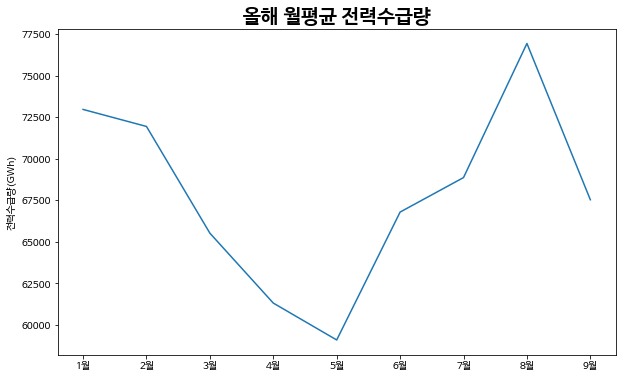

In [ ]:
this_year = df_avg_index
this_year = this_year.drop(['10월', '11월', '12월'], axis=1)
is_month = this_year.columns

list_month = []
for m in is_month:
    list_month.append(m)

month_value = []
one = 1
for k in range(len(list_month)):
    v = this_year.iat[one, k]
    month_value.append(v)

plt.figure(figsize=(10,6))

x = list_month
y = month_value

plt.plot(x, y)

plt.ylabel('전력수급량(GWh)')
plt.title('올해 월평균 전력수급량', fontdict={'fontsize': 20, 'fontweight': 'bold'})
plt.show()

 <br/>



>  **근년 평균 전력수급량**



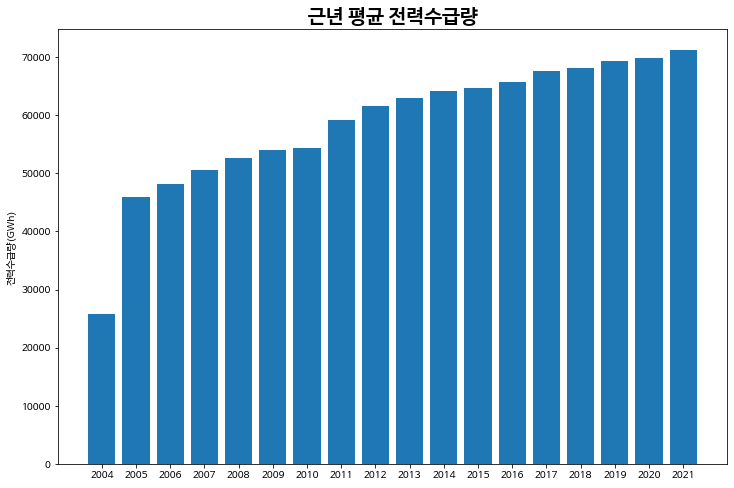

In [ ]:
plt.figure(figsize=(12,8))

x = sorted(list_year)
y = sorted(year_value)

plt.bar(x, y)

plt.ylabel('전력수급량(GWh)')
plt.title('근년 평균 전력수급량', fontdict={'fontsize': 20, 'fontweight': 'bold'})
plt.show()

 <br/>



>  **연도별 최대 전력수급량**



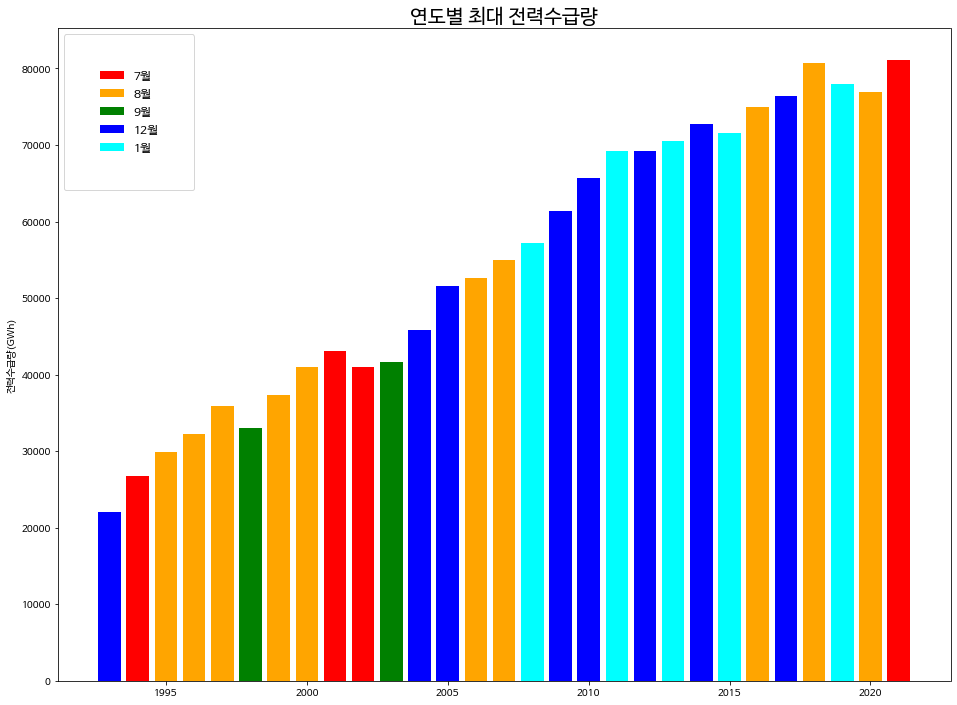

In [ ]:
list_max_month = list(max_month)
avg_max.reverse()

x = sorted(index_list)
y = avg_max

fig = plt.figure(figsize=(16, 12))
plt.bar(x, y)

red_list = [1994, 2001, 2002, 2021]
orange_list = [1995, 1996, 1997, 1999, 2000, 2006, 2007, 2016, 2018, 2020]
green_list = [1998, 2003]
blue_list = [1993, 2004, 2005, 2009, 2010, 2012, 2014, 2017]
cyan_list = [2008, 2011, 2013, 2015, 2019]

red_max = []
orange_max = []
green_max = []
blue_max = []
cyan_max = []

for i in red_list:
    red_max.append(df_avg_max[i])

plt.bar(red_list, red_max, color='red', label='7월')

for i in orange_list:
    orange_max.append(df_avg_max[i])

plt.bar(orange_list, orange_max, color='orange', label='8월')

for i in green_list:
    green_max.append(df_avg_max[i])

plt.bar(green_list, green_max, color='green', label='9월')

for i in blue_list:
    blue_max.append(df_avg_max[i])

plt.bar(blue_list, blue_max, color='blue', label='12월')

for i in cyan_list:
    cyan_max.append(df_avg_max[i])

plt.bar(cyan_list, cyan_max, color='cyan', label='1월')

plt.title('연도별 최대 전력수급량',fontsize=20)
plt.ylabel('전력수급량(GWh)')
plt.legend(borderpad=3, prop={'size': 12})
plt.show()

 <br/>

 <br/>



>  **올해 설비용량**



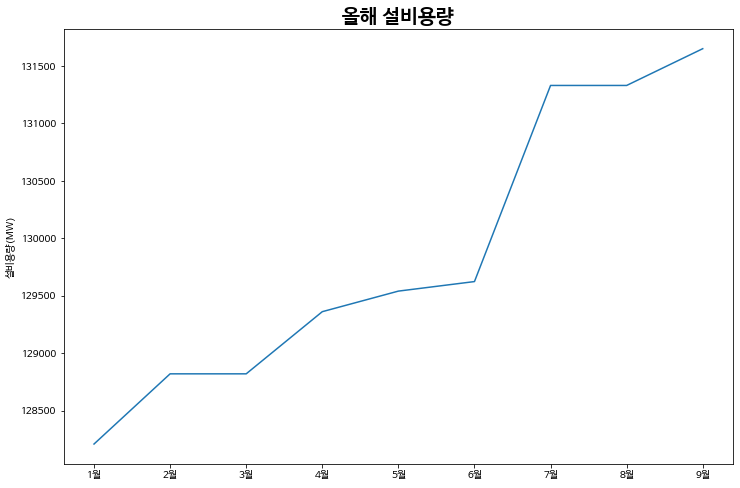

In [ ]:
plt.figure(figsize=(12,8))

x = list_month
y = sorted(a)

plt.plot(x, y)

plt.ylabel('설비용량(MW)')
plt.title('올해 설비용량', fontdict={'fontsize': 20, 'fontweight': 'bold'})
plt.show()



>  **올해 공급능력**



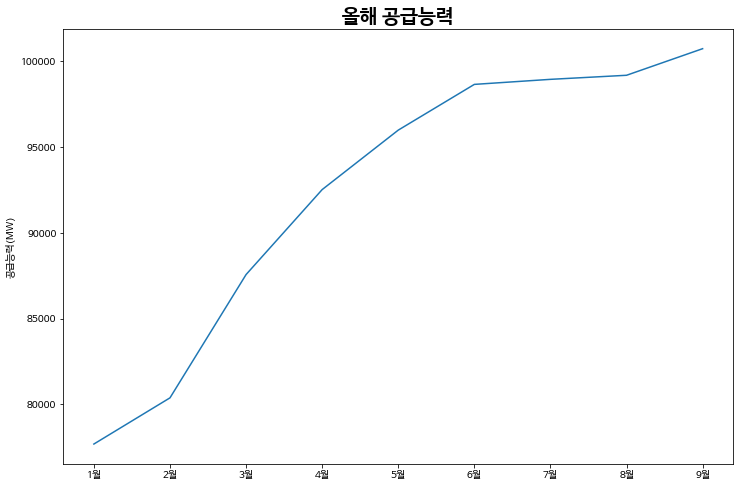

In [ ]:
plt.figure(figsize=(12,8))

x = list_month
y = sorted(b)

plt.plot(x, y)

plt.ylabel('공급능력(MW)')
plt.title('올해 공급능력', fontdict={'fontsize': 20, 'fontweight': 'bold'})
plt.show()



>  **올해 공급예비력**



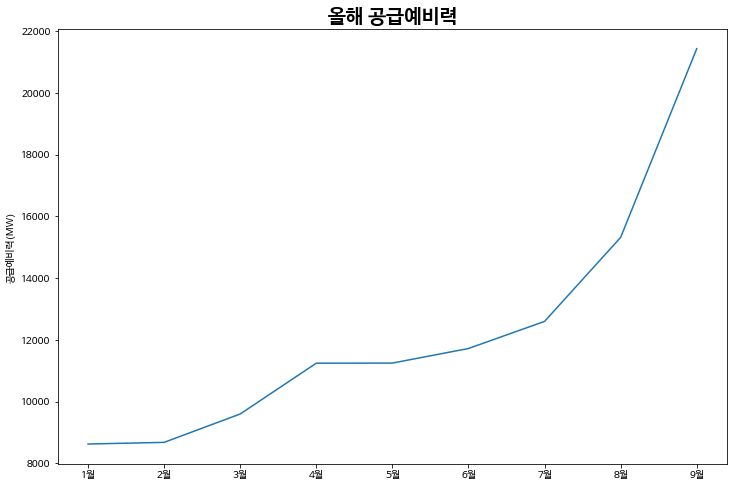

In [ ]:
plt.figure(figsize=(12,8))

x = list_month
y = sorted(c)

plt.plot(x, y)

plt.ylabel('공급예비력(MW)')
plt.title('올해 공급예비력', fontdict={'fontsize': 20, 'fontweight': 'bold'})
plt.show()



>  **올해 공급예비율**



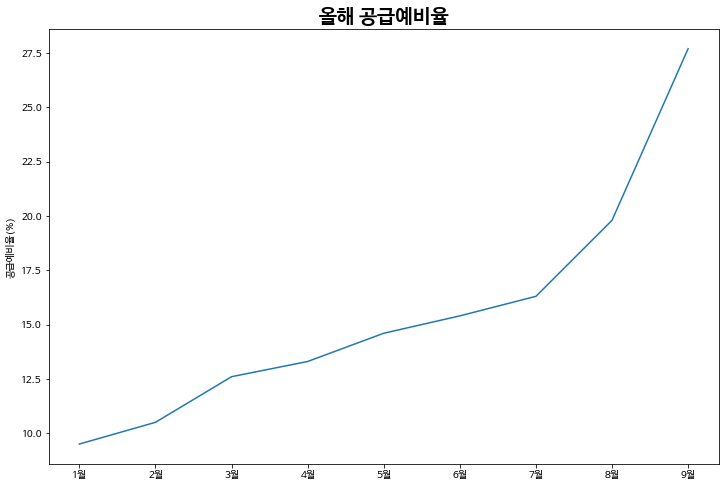

In [ ]:
plt.figure(figsize=(12,8))

x = list_month
y = sorted(d)

plt.plot(x, y)

plt.ylabel('공급예비율(%)')
plt.title('올해 공급예비율', fontdict={'fontsize': 20, 'fontweight': 'bold'})
plt.show()

 <br/>



>  **연도별 평균 설비용량**



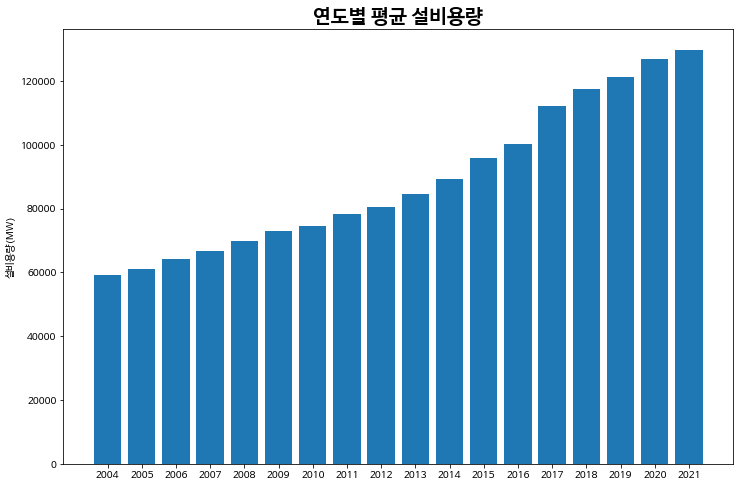

In [ ]:
plt.figure(figsize=(12,8))

x = sorted(list_year)
y = sorted(three_list)

plt.bar(x, y)

plt.ylabel('설비용량(MW)')
plt.title('연도별 평균 설비용량', fontdict={'fontsize': 20, 'fontweight': 'bold'})
plt.show()



>  **연도별 평균 공급능력**



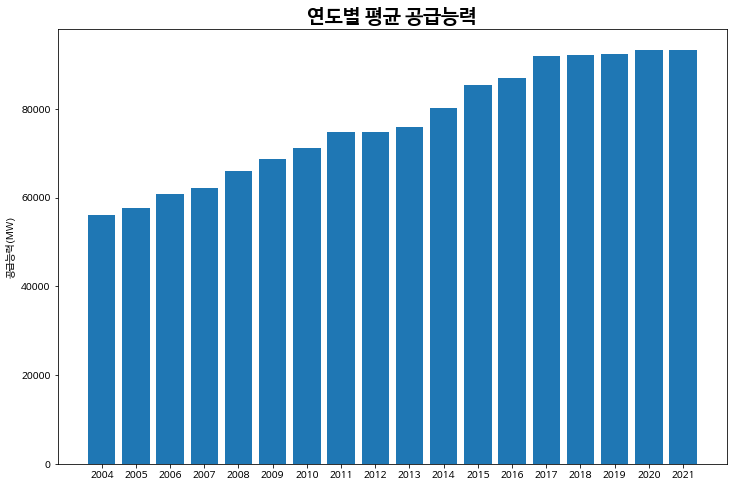

In [ ]:
plt.figure(figsize=(12,8))

x = sorted(list_year)
y = sorted(four_list)

plt.bar(x, y)

plt.ylabel('공급능력(MW)')
plt.title('연도별 평균 공급능력', fontdict={'fontsize': 20, 'fontweight': 'bold'})
plt.show()



>  **연도별 평균 공급예비력**



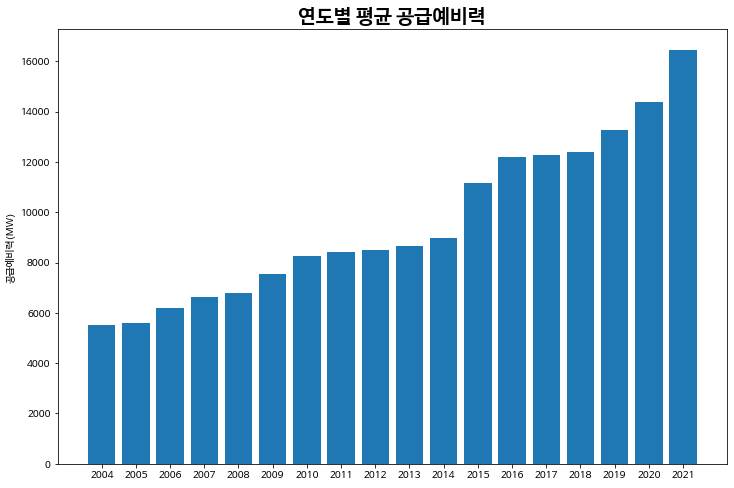

In [ ]:
plt.figure(figsize=(12,8))

x = sorted(list_year)
y = sorted(six_list)

plt.bar(x, y)

plt.ylabel('공급예비력(MW)')
plt.title('연도별 평균 공급예비력', fontdict={'fontsize': 20, 'fontweight': 'bold'})
plt.show()



>  **연도별 평균 공급예비율**



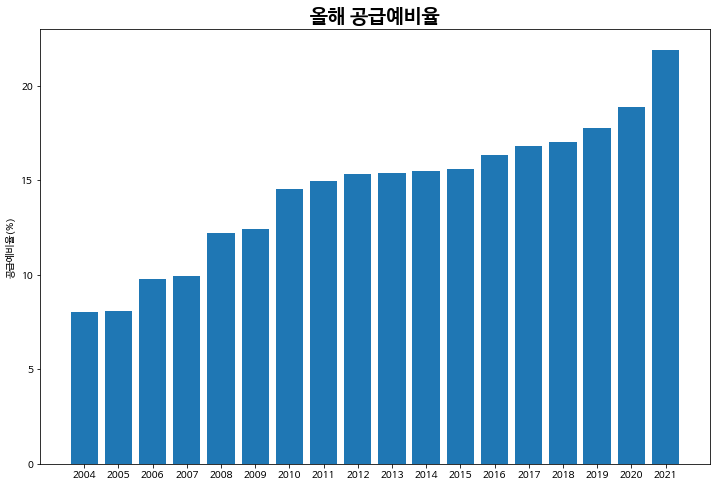

In [ ]:
plt.figure(figsize=(12,8))

x = sorted(list_year)
y = sorted(seven_list)

plt.bar(x, y)

plt.ylabel('공급예비율(%)')
plt.title('올해 공급예비율', fontdict={'fontsize': 20, 'fontweight': 'bold'})
plt.show()